# Elo rating for ATP matches

**The objective:**
Analyze the data on ATP matches for the past 10+ years and build an Elo rating system to predict the outcomes of future ATP matches. 

**Datasets used:**  
- Records of all ATP matches from 2014–2024 (1 year per CSV file)  
- Records of all ATP matches from Jan–Sep 2025  
- Player rankings from 2010–2024  
- Player information for all professional ATP players (1968–2024) 

**The structure of the project includes:** 
1. Data Loading
2. Data Merging
3. Data Cleaning
4. Identifying Top-20 players of 2020-2024
5. Analyzing match stats of Top-20 players on different surfaces
6. Analyzing match stats of Top-20 players across years
7. Head-to-head weakness analysis of Carlos Alcaraz vs other top-20 players he played with in 2023-2024
8. Building Elo rating
9. Training ML model to predict matches based on Elo rating
10. Case study


#### Data Loading
First, we load datasets containing information on all matches from 2014 to 2024 provided by Jeff Sackmann. (The dataset on matches in 2025 is not available yet).
Source: Jeff Sackmann’s [Tennis-ATP GitHub repository](https://github.com/JeffSackmann/tennis_atp).  
This repository contains match results, rankings, and player information from 1968 onwards.  

In [379]:
import pandas as pd
from pathlib import Path

In [380]:
#Checking that all needed files are in the right folder
import os
os.listdir("../data/raw") 


['atp_matches_2019.csv',
 'atp_matches_2024.csv',
 'atp_matches_2018.csv',
 'atp_rankings_20s.csv',
 'atp_matches_2023.csv',
 '.DS_Store',
 'atp_matches_2022.csv',
 'atp_matches_2020.csv',
 'atp_matches_2021.csv',
 'atp_rankings_10s.csv',
 '2025 - 2025.csv',
 'atp_rankings_current.csv',
 'atp_matches_2016.csv',
 'atp_matches_2017.csv',
 'atp_matches_2015.csv',
 'atp_players.csv',
 'atp_matches_2014.csv']

In [381]:
RAW = Path("../data/raw")   # setting static data path
YEARS = range(2014, 2025)  # 2014–2024 inclusive

frames = []  
for y in YEARS:         #looping over data files to download each file into a list of datasets with less code
    f = RAW / f"atp_matches_{y}.csv"
    df = pd.read_csv(f)
    df["year"] = y
    frames.append(df)

matches_to_2024 = pd.concat(frames, ignore_index=True)   #Concating a list datasets into one, merged matches_all dataset
print(matches_to_2024.shape)
matches_to_2024.columns

(30573, 50)


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'year'],
      dtype='object')

In [382]:
matches_to_2024.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,2014-339,Brisbane,Hard,28,A,20131229,1,103813,NaN,NaN,...,23.0,6.0,8.0,2.0,5.0,39.0,1090.0,136.0,425.0,2014
1,2014-339,Brisbane,Hard,28,A,20131229,2,104594,NaN,NaN,...,51.0,18.0,17.0,7.0,11.0,61.0,774.0,35.0,1160.0,2014
2,2014-339,Brisbane,Hard,28,A,20131229,3,105023,NaN,NaN,...,26.0,12.0,11.0,6.0,9.0,46.0,960.0,29.0,1244.0,2014
3,2014-339,Brisbane,Hard,28,A,20131229,4,105032,NaN,WC,...,43.0,15.0,12.0,4.0,4.0,172.0,307.0,100.0,549.0,2014
4,2014-339,Brisbane,Hard,28,A,20131229,5,103917,NaN,NaN,...,43.0,12.0,14.0,2.0,4.0,50.0,918.0,70.0,697.0,2014


In [383]:
matches_to_2024.info()
matches_to_2024.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30573 entries, 0 to 30572
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          30573 non-null  object 
 1   tourney_name        30573 non-null  object 
 2   surface             30520 non-null  object 
 3   draw_size           30573 non-null  int64  
 4   tourney_level       30573 non-null  object 
 5   tourney_date        30573 non-null  int64  
 6   match_num           30573 non-null  int64  
 7   winner_id           30573 non-null  int64  
 8   winner_seed         12991 non-null  float64
 9   winner_entry        4304 non-null   object 
 10  winner_name         30573 non-null  object 
 11  winner_hand         30573 non-null  object 
 12  winner_ht           30346 non-null  float64
 13  winner_ioc          30573 non-null  object 
 14  winner_age          30570 non-null  float64
 15  loser_id            30573 non-null  int64  
 16  lose

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
count,30573.000000,3.057300e+04,30573.000000,30573.000000,12991.000000,30346.000000,30570.000000,30573.000000,7487.000000,29993.000000,...,29163.000000,29163.000000,29163.000000,29163.000000,29163.000000,30406.000000,30406.000000,30166.000000,30166.000000,30573.000000
mean,58.811697,2.019025e+07,207.590586,121590.295064,7.659226,187.549364,27.292041,121518.117816,9.046881,186.739739,...,33.784864,14.922950,12.525392,4.777904,8.510167,74.762974,1880.490298,110.946098,1140.975900,2018.973310
std,42.718060,3.260644e+04,147.500591,32783.904651,7.042062,7.357327,4.429781,32591.811060,7.578325,7.136736,...,14.533189,7.061925,4.246769,3.292241,4.184598,127.863601,2245.224063,178.791832,1269.807417,3.255066
min,2.000000,2.013123e+07,1.000000,100644.000000,1.000000,3.000000,14.900000,100644.000000,1.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2014.000000
25%,32.000000,2.016071e+07,104.000000,104918.000000,3.000000,183.000000,24.000000,104979.000000,4.000000,183.000000,...,23.000000,10.000000,9.000000,2.000000,6.000000,18.000000,685.000000,35.000000,540.000000,2016.000000
50%,32.000000,2.019030e+07,271.000000,105777.000000,6.000000,188.000000,27.100000,105870.000000,7.000000,185.000000,...,32.000000,14.000000,12.000000,4.000000,8.000000,44.000000,1045.000000,65.000000,812.000000,2019.000000
75%,96.000000,2.022052e+07,288.000000,125802.000000,10.000000,193.000000,30.400000,124079.000000,12.000000,191.000000,...,42.000000,19.000000,15.000000,7.000000,11.000000,83.000000,2050.000000,110.000000,1245.000000,2022.000000
max,128.000000,2.024122e+07,1701.000000,212721.000000,33.000000,211.000000,44.600000,212970.000000,33.000000,211.000000,...,171.000000,55.000000,50.000000,27.000000,38.000000,2101.000000,16950.000000,2159.000000,16950.000000,2024.000000


In [384]:
matches_to_2024.isna().sum().sort_values(ascending=False).head(30)

winner_entry          26269
loser_entry           23803
loser_seed            23086
winner_seed           17582
minutes                3051
w_1stWon               1410
w_1stIn                1410
w_svpt                 1410
w_df                   1410
w_ace                  1410
w_bpSaved              1410
w_2ndWon               1410
w_bpFaced              1410
l_ace                  1410
l_df                   1410
l_svpt                 1410
l_1stIn                1410
w_SvGms                1410
l_1stWon               1410
l_2ndWon               1410
l_SvGms                1410
l_bpSaved              1410
l_bpFaced              1410
loser_ht                580
loser_rank              407
loser_rank_points       407
winner_ht               227
winner_rank             167
winner_rank_points      167
surface                  53
dtype: int64

#### Matches_to_2024 dataset overview:
- **Shape**: 50 columns, 30573 rows -30573 matches recorded

- **Key Columns**: 'surface' , 'tourney_level','tourney_date', 'winner_id', 'winner_name', 'loser_id', 'loser_name', 'minutes','w_1stIn', 'w_1stWon', 'w_2ndWon','winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points','year'

- Some missing values in the key columns.  
- Player ages range from 15 to 42 years old.  
- Player rank points range from 1 to 16950 points.


#### Dataset: ATP Matches 2025  
Source: [Tennis-Data.co.uk](http://www.tennis-data.co.uk), All Tournaments archive.  
Covers matches from Jan–Sep 2025.

In [385]:
import pandas as pd

matches_2025 = pd.read_csv(RAW/"2025 - 2025.csv")
matches_2025.head()


,ATP,Location,tourney_name,tourney_date,Series,Court,surface,Round,Best of,winner_name,...,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL,BFEW,BFEL
0,1,Brisbane,Brisbane International,29/12/2024,ATP250,Outdoor,Hard,1st Round,3,Vukic A.,...,2.00,1.80,2.08,1.83,2.14,1.83,2.03,1.78,NaN,NaN
1,1,Brisbane,Brisbane International,30/12/2024,ATP250,Outdoor,Hard,1st Round,3,Michelsen A.,...,1.44,2.75,1.48,2.85,1.48,2.90,1.43,2.74,NaN,NaN
2,1,Brisbane,Brisbane International,30/12/2024,ATP250,Outdoor,Hard,1st Round,3,Bonzi B.,...,1.67,2.20,1.73,2.22,1.73,2.25,1.67,2.18,NaN,NaN
3,1,Brisbane,Brisbane International,30/12/2024,ATP250,Outdoor,Hard,1st Round,3,Nishioka Y.,...,1.53,2.50,1.64,2.39,1.65,2.50,1.59,2.36,NaN,NaN
4,1,Brisbane,Brisbane International,30/12/2024,ATP250,Outdoor,Hard,1st Round,3,Thompson J.,...,2.63,1.50,2.47,1.60,2.63,1.60,2.48,1.54,NaN,NaN


In [386]:
matches_2025.columns

Index(['ATP', 'Location', 'tourney_name', 'tourney_date', 'Series', 'Court',
       'surface', 'Round', 'Best of', 'winner_name', 'loser_name', 'WRank',
       'LRank', 'WPts', 'LPts', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4',
       'W5', 'L5', 'Wsets', 'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL',
       'MaxW', 'MaxL', 'AvgW', 'AvgL', 'BFEW', 'BFEL'],
      dtype='object')

In [387]:
matches_2025.shape
matches_2025.describe()

,ATP,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,...,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL,BFEW,BFEL
count,2220.000000,2220.000000,2220.000000,2217.000000,2220.000000,2217.000000,2201.000000,2201.000000,2184.000000,2183.000000,...,2208.000000,2208.000000,2184.000000,2184.000000,2220.000000,2220.000000,2220.000000,2220.000000,228.000000,228.000000
mean,26.266667,3.456757,62.447297,88.011276,1978.836486,1240.040144,5.787369,4.215357,5.717033,4.018323,...,1.902192,3.394420,1.968347,3.586850,2.010486,4.028955,1.892045,3.305329,1.970526,5.083684
std,13.742139,0.839765,77.789732,109.280269,2089.945543,1189.212110,1.288849,1.794426,1.299622,1.816422,...,1.064172,3.628131,1.179106,4.544926,1.256316,6.255510,1.026641,3.174787,0.999534,8.413523
min,1.000000,3.000000,1.000000,1.000000,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.040000,1.010000,1.040000,1.010000,1.030000,1.010000,1.150000
25%,16.000000,3.000000,17.000000,36.000000,739.000000,590.000000,6.000000,3.000000,6.000000,3.000000,...,1.300000,1.670000,1.340000,1.740000,1.350000,1.760000,1.310000,1.700000,1.335000,1.787500
50%,26.000000,3.000000,45.000000,65.000000,1200.000000,899.000000,6.000000,4.000000,6.000000,4.000000,...,1.570000,2.380000,1.630000,2.410000,1.650000,2.500000,1.580000,2.360000,1.645000,2.510000
75%,38.000000,3.000000,82.000000,103.000000,2530.000000,1388.000000,6.000000,6.000000,6.000000,6.000000,...,2.200000,3.500000,2.210000,3.560000,2.260000,3.700000,2.150000,3.422500,2.240000,3.837500
max,48.000000,5.000000,937.000000,1476.000000,12030.000000,12030.000000,7.000000,7.000000,7.000000,7.000000,...,15.000000,51.000000,17.730000,90.330000,17.730000,90.330000,12.530000,33.420000,7.200000,80.000000


In [388]:
matches_2025.isna().sum().sort_values(ascending=False).head(30)

L5              2120
W5              2120
BFEL            1992
BFEW            1992
L4              1952
W4              1952
L3              1110
W3              1110
L2                37
W2                36
PSW               36
PSL               36
W1                19
Wsets             19
L1                19
Lsets             19
B365L             12
B365W             12
LPts               3
LRank              3
Comment            0
AvgW               0
MaxL               0
MaxW               0
AvgL               0
tourney_name       0
Best of            0
Series             0
tourney_date       0
winner_name        0
dtype: int64

### Matches_2025 dataset overview:
- **Shape**: 38 columns, 2220 rows-2220 matches included
- **Key Columns**: 'tourney_date', 'Series', 'surface', 'Best of', 'winner_name', 'loser_name', 'WRank',
       'LRank', 'WPts', 'LPts'
- Some missing values in non-essential columns

In [389]:
##Checking name format in main dataset
matches_to_2024["winner_name"]

0                  Jarkko Nieminen
1                Marinko Matosevic
2                      Sam Querrey
3                        Sam Groth
4                    Nicolas Mahut
                   ...            
30568    Joaquin  Aguilar Cardozo 
30569                 Nam Hoang Ly
30570                 Kris Van Wyk
30571                 Nam Hoang Ly
30572               Philip Henning
Name: winner_name, Length: 30573, dtype: object

#### Note on 2025 data
The ATP 2025 dataset uses a different format for player names (last name + initials), 
while datasets from 2014–2024 use full names and already include player IDs. 

Because of this mismatch, integrating 2025 would require heavy reformatting without adding 
significant value for this project. To maintain consistency and focus on analysis, 
**I limited the scope to 2014–2024.**


#### Dataset: Players
Source: Jeff Sackmann’s [Tennis-ATP GitHub repository](https://github.com/JeffSackmann/tennis_atp).  
This repository contains player information from 1968 onwards.  

In [390]:
#Uploading players dataset
players=pd.read_csv(RAW/"atp_players.csv",
dtype='str'
)

players.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122,USA,185,Q54544
1,100002,Pancho,Segura,R,19210620,ECU,168,Q54581
2,100003,Frank,Sedgman,R,19271002,AUS,180,Q962049
3,100004,Giuseppe,Merlo,R,19271011,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509,USA,188,Q53554


In [391]:

players.info()
players.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65989 entries, 0 to 65988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    65989 non-null  object
 1   name_first   65068 non-null  object
 2   name_last    65941 non-null  object
 3   hand         65973 non-null  object
 4   dob          47587 non-null  object
 5   ioc          65319 non-null  object
 6   height       4159 non-null   object
 7   wikidata_id  4894 non-null   object
dtypes: object(8)
memory usage: 4.0+ MB


(65989, 8)

In [392]:
players.describe()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
count,65989,65068,65941,65973,47587,65319,4159,4894
unique,65989,14488,40250,4,17312,228,43,4825
top,100001,David,Smith,U,19950209,USA,183,Q2163514
freq,1,594,170,47800,15,13228,623,2


#### Players dataset overview:

- **Shape**:8 rows, 65989 rows- 65989 players
- **Key Columns**: 'player_id', 'name_first', 'name_last'
- Some missing values in key columns

#### Data Cleaning

1. Matches_all dataset

In [393]:
#Formatting tourney_date column to the right format
matches_to_2024["tourney_date"] = pd.to_datetime(
    matches_to_2024["tourney_date"], 
    format="%Y%m%d", errors="coerce"
)


NUMERIC_COLS = [
    "winner_rank","loser_rank","winner_rank_points","loser_rank_points",
    "best_of","minutes",
    "w_ace","w_df","w_svpt","w_1stIn","w_1stWon","w_2ndWon",
    "w_SvGms","w_bpSaved","w_bpFaced",
    "l_ace","l_df","l_svpt","l_1stIn","l_1stWon","l_2ndWon",
    "l_SvGms","l_bpSaved","l_bpFaced"
]

#Ensuring all columns that are supposed to be numeric have one, Int64 datatype.
for c in NUMERIC_COLS:
    if c in matches_to_2024.columns:
        matches_to_2024[c] = pd.to_numeric(matches_to_2024[c], errors="coerce").astype("Int64")




In [394]:
# checking unique surfaces and their counts
matches_to_2024["surface"].value_counts(dropna=False)

surface
Hard      18007
Clay       9254
Grass      3233
NaN          53
Carpet       26
Name: count, dtype: int64

In [395]:
surf_map = {
    "Carpet": "Hard",  #changing Carpet surfaces to Hard surfaces as carpet surfaces are not used anymore but are very close to hard surface type.
}

matches_to_2024["surface"] = (
    matches_to_2024["surface"]
    .replace(surf_map)
    .str.title()
)

In [396]:
#checking unique round names
print(matches_to_2024["round"].value_counts(dropna=False))

round
R32     9364
R16     5432
R64     4421
R128    3584
RR      2921
QF      2728
SF      1412
F        706
BR         5
Name: count, dtype: int64


In [397]:
#checking unique tourney_level names
print(matches_to_2024["tourney_level"].value_counts(dropna=False))

tourney_level
A    16381
M     5988
G     5461
D     2452
F      227
O       64
Name: count, dtype: int64


In [398]:
#creating a new column "is_walkover_or_ret" to divide matches in two groups: (1) the ones that were not played fully (retired, walked over...), (0) the ones that were played fully and have valid score.
def is_invalid_score(s):
    if pd.isna(s):
        return False
    s = str(s).upper()
    return any(tag in s for tag in ["W/O", "WO", "RET", "DEF", "ABD", "UNP"])

matches_to_2024["is_walkover_or_ret"] = matches_to_2024["score"].map(is_invalid_score)

print(matches_to_2024["is_walkover_or_ret"].value_counts())


is_walkover_or_ret
False    29538
True      1035
Name: count, dtype: int64


In [399]:
#checking duplicates 
exact_dups = matches_to_2024.duplicated(keep=False).sum()
print("Exact-duplicate rows (counting both originals and copies):", exact_dups)

Exact-duplicate rows (counting both originals and copies): 0


In [400]:
#checking values
print(matches_to_2024.dtypes.loc[["tourney_date","best_of","winner_rank","loser_rank"]])
print(matches_to_2024.isna().mean().sort_values(ascending=False).head(10))


tourney_date    datetime64[ns]
best_of                  Int64
winner_rank              Int64
loser_rank               Int64
dtype: object
winner_entry    0.859222
loser_entry     0.778563
loser_seed      0.755111
winner_seed     0.575083
minutes         0.099794
w_2ndWon        0.046119
w_1stWon        0.046119
w_1stIn         0.046119
w_svpt          0.046119
w_df            0.046119
dtype: float64


In [401]:
matches_to_2024.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,is_walkover_or_ret
0,2014-339,Brisbane,Hard,28,A,2013-12-29,1,103813,NaN,NaN,...,6,8,2,5,39,1090,136,425,2014,False
1,2014-339,Brisbane,Hard,28,A,2013-12-29,2,104594,NaN,NaN,...,18,17,7,11,61,774,35,1160,2014,False
2,2014-339,Brisbane,Hard,28,A,2013-12-29,3,105023,NaN,NaN,...,12,11,6,9,46,960,29,1244,2014,False
3,2014-339,Brisbane,Hard,28,A,2013-12-29,4,105032,NaN,WC,...,15,12,4,4,172,307,100,549,2014,False
4,2014-339,Brisbane,Hard,28,A,2013-12-29,5,103917,NaN,NaN,...,12,14,2,4,50,918,70,697,2014,False


In [402]:
#checking null values
matches_to_2024[matches_to_2024["tourney_date"].isna()]
matches_to_2024[matches_to_2024["winner_id"].isna()]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,is_walkover_or_ret


In [403]:
#checking null values
matches_to_2024.isna().sum().sort_values(ascending=False).head(30)

winner_entry          26269
loser_entry           23803
loser_seed            23086
winner_seed           17582
minutes                3051
w_2ndWon               1410
w_1stWon               1410
w_1stIn                1410
w_svpt                 1410
w_df                   1410
l_1stWon               1410
w_SvGms                1410
w_ace                  1410
l_ace                  1410
l_df                   1410
l_svpt                 1410
l_1stIn                1410
w_bpSaved              1410
w_bpFaced              1410
l_SvGms                1410
l_bpFaced              1410
l_bpSaved              1410
l_2ndWon               1410
loser_ht                580
loser_rank              407
loser_rank_points       407
winner_ht               227
winner_rank             167
winner_rank_points      167
surface                  53
dtype: int64

In [404]:
#Filling null values in winner_entry and loser_entry columns with DA=Direct Acceptance for completeness
matches_to_2024["winner_entry"] = matches_to_2024["winner_entry"].fillna("DA")
matches_to_2024["loser_entry"] = matches_to_2024["loser_entry"].fillna("DA")

#Filling null values in winner_seed and loser_entry columns with 0 for easier analysis
matches_to_2024["winner_seed"] = matches_to_2024["winner_seed"].fillna(0).astype(int)
matches_to_2024["loser_seed"]  = matches_to_2024["loser_seed"].fillna(0).astype(int)

Other null values in columns are not essential to our analysis, we can leave them as they are.


2. Players dataset cleaning

In [405]:
#Formatting numeric columns to numeric datatype and dates to "%Y%m%d" format.
players["height"] = pd.to_numeric(players["height"], errors="coerce")
players["player_id"] = pd.to_numeric(players["player_id"], errors="coerce", downcast="integer")
players["dob"] = pd.to_datetime(players["dob"] , format="%Y%m%d", errors="coerce")

players.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,1913-11-22,USA,185.0,Q54544
1,100002,Pancho,Segura,R,1921-06-20,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,1927-10-02,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,1927-10-11,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,1928-05-09,USA,188.0,Q53554


In [406]:
players.isna().sum().sort_values(ascending=False)

height         61830
wikidata_id    61095
dob            18504
name_first       921
ioc              670
name_last         48
hand              16
player_id          0
dtype: int64

#### Missing Values in Player Information Dataset

- `player_id` is complete (0 missing) → reliable join key.  
- `name_last` and `hand` are almost complete.  
- `height` and `wikidata_id` have large numbers of missing values, so they will not be used in this project.  
- `dob` has ~18k missing values. Age-based analysis will only be possible for players with valid dates of birth.  
- `ioc` is missing for ~670 players, but this will not affect Elo calculation.  


#### Ranking dataset 
**Source**: Jeff Sackmann’s [Tennis-ATP GitHub repository](https://github.com/JeffSackmann/tennis_atp).  
This repository contains ranking information on players from 1968 onwards.  

In [407]:
#Loading ranking datasets of 2010s and 2020s and merging together
df10s=pd.read_csv(RAW/"atp_rankings_10s.csv")
df20s=pd.read_csv(RAW/"atp_rankings_20s.csv")
rankings_all = pd.concat([df10s, df20s], ignore_index=True) #uploading and concatting rankings data of 2000-2024.
rankings_all.rename(columns={'player':'player_id'}, inplace=True)
rankings_all.head()

,ranking_date,rank,player_id,points
0,20100104,1,103819,10550.0
1,20100104,2,104745,9205.0
2,20100104,3,104925,8310.0
3,20100104,4,104918,7030.0
4,20100104,5,105223,6785.0


In [408]:
print(rankings_all.columns)
rankings_all.shape


Index(['ranking_date', 'rank', 'player_id', 'points'], dtype='object')


(1248560, 4)

#### rankings_all dataset overview:
- **Description**: official ATP rankings updated weekly from 2010 til 2024 inclusive
- **shape**: 4 colums, 1 248 560 rows -ranking records
- **columns**: 'ranking_date', 'rank', 'player_id', 'points'

#### ranking_all dataset cleaning

In [409]:
#Formatting dates in rankings_all dataset to the "%Y%m%d" format.
rankings_all["ranking_date"] = pd.to_datetime(rankings_all["ranking_date"], format="%Y%m%d")

#Creating new dataset with values filtered to the period 2014-2024
rankings_2014_2024 = rankings_all[
    rankings_all["ranking_date"].dt.year.between(2014, 2024)
]
rankings_2014_2024.head()

,ranking_date,rank,player_id,points
364263,2014-01-06,1,104745,13130.0
364264,2014-01-06,2,104925,12260.0
364265,2014-01-06,3,103970,5800.0
364266,2014-01-06,4,104918,5560.0
364267,2014-01-06,5,105223,5255.0


In [410]:
rankings_2014_2024[rankings_2014_2024["ranking_date"].dt.year.between(2020, 2024)].head()


,ranking_date,rank,player_id,points
915618,2020-01-06,1,104745,9985.0
915619,2020-01-06,2,104925,9055.0
915620,2020-01-06,3,103819,6590.0
915621,2020-01-06,4,106233,5825.0
915622,2020-01-06,5,106421,5705.0


#### Creating **rankings_named** dataset by merging rankings_2014_2024 and player datasets

In [411]:
#Merging rankings_2014_2024 dataset with players dataset to add first, last names, hand and ioc details on player_id column.
rankings_named = rankings_2014_2024.merge(
    players[["player_id","name_first","name_last","hand","ioc"]],
    on="player_id",
    how="left"
)

#Formatting numeric columns
rankings_named["points"] = pd.to_numeric(rankings_named["points"], errors="coerce")
rankings_named["rank"] = pd.to_numeric(rankings_named["rank"], errors="coerce")
rankings_named["player_id"] = pd.to_numeric(rankings_named["player_id"], errors="coerce")

rankings_named.head()

,ranking_date,rank,player_id,points,name_first,name_last,hand,ioc
0,2014-01-06,1,104745,13130.0,Rafael,Nadal,L,ESP
1,2014-01-06,2,104925,12260.0,Novak,Djokovic,R,SRB
2,2014-01-06,3,103970,5800.0,David,Ferrer,R,ESP
3,2014-01-06,4,104918,5560.0,Andy,Murray,R,GBR
4,2014-01-06,5,105223,5255.0,Juan Martin,del Potro,R,ARG


In [412]:
print("Rankings_named dataset has", rankings_named.shape[0], "rows and ", rankings_named.shape[1], "columns")
rankings_named.info()
rankings_named.describe()

Rankings_named dataset has 884297 rows and  8 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884297 entries, 0 to 884296
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ranking_date  884297 non-null  datetime64[ns]
 1   rank          884297 non-null  int64         
 2   player_id     884297 non-null  int64         
 3   points        884066 non-null  float64       
 4   name_first    884297 non-null  object        
 5   name_last     884297 non-null  object        
 6   hand          884297 non-null  object        
 7   ioc           884297 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 54.0+ MB


,ranking_date,rank,player_id,points
count,884297,884297.000000,884297.000000,884066.000000
mean,2018-10-30 11:36:37.106628096,1026.063651,141263.803626,128.089875
min,2014-01-06 00:00:00,1.000000,100644.000000,1.000000
25%,2016-02-29 00:00:00,502.000000,105966.000000,2.000000
50%,2018-06-25 00:00:00,1024.000000,124014.000000,10.000000
75%,2021-08-16 00:00:00,1550.000000,200304.000000,67.000000
max,2023-12-25 00:00:00,2271.000000,212598.000000,16950.000000
std,NaN,600.715994,41723.037676,513.385471


#### ranking_named overview:
- Minimal points: 1 point
- Maximum points: 16950 points

In [413]:
#Highest (ever achieved) ATP points belong to Novak Djokovic 
rankings_named[rankings_named["points"]==16950]

,ranking_date,rank,player_id,points,name_first,name_last,hand,ioc
243669,2016-06-06,1,104925,16950.0,Novak,Djokovic,R,SRB
245890,2016-06-13,1,104925,16950.0,Novak,Djokovic,R,SRB
247499,2016-06-20,1,104925,16950.0,Novak,Djokovic,R,SRB
249674,2016-06-27,1,104925,16950.0,Novak,Djokovic,R,SRB


In [414]:
#checking null values
rankings_named.isna().sum()

ranking_date      0
rank              0
player_id         0
points          231
name_first        0
name_last         0
hand              0
ioc               0
dtype: int64

In [415]:
#looking into null values in points column
rankings_named[rankings_named["points"].isna()].tail(20)

,ranking_date,rank,player_id,points,name_first,name_last,hand,ioc
532324,2019-10-28,476,209506,NaN,Francesco,Forti,R,ITA
532660,2019-10-28,812,200713,NaN,Federico,Iannaccone,R,ITA
534304,2019-11-04,475,209506,NaN,Francesco,Forti,R,ITA
534644,2019-11-04,815,200713,NaN,Federico,Iannaccone,R,ITA
536284,2019-11-11,478,209506,NaN,Francesco,Forti,R,ITA
536618,2019-11-11,812,200713,NaN,Federico,Iannaccone,R,ITA
538235,2019-11-18,465,209506,NaN,Francesco,Forti,R,ITA
538567,2019-11-18,797,200713,NaN,Federico,Iannaccone,R,ITA
540194,2019-11-25,460,209506,NaN,Francesco,Forti,R,ITA
540530,2019-11-25,796,200713,NaN,Federico,Iannaccone,R,ITA


In [416]:
#Null values are present across years
rankings_named[rankings_named["points"].isna()]["ranking_date"].value_counts()

ranking_date
2018-08-20    2
2018-06-11    2
2019-05-20    2
2019-05-13    2
2018-12-17    2
             ..
2019-04-01    1
2019-04-08    1
2019-04-15    1
2019-04-22    1
2017-03-20    1
Name: count, Length: 132, dtype: int64

In [417]:
#Seeing if null values are present for specific players
rankings_named[rankings_named["points"].isna()]["name_last"].value_counts()

name_last
Forti         132
Iannaccone     99
Name: count, dtype: int64

In [418]:
rankings_named = rankings_named.dropna(subset=["points"])

#### Handling missing ranking points
In the ATP rankings dataset (2000–2024), only 231 rows (~0.02%) have missing values 
in the `points` column. These belong exclusively to two players 
(*Francesca Forti* and *Federico Iannaccone*), likely due to incomplete records 
at the Challenger/ITF level.

Since the proportion is negligible, I chose to drop these rows to keep the dataset consistent.


### Analysis of matches 2014-2024

1. We create a clean dataset without null values in key columns
2. Identify top 20 players in the last 4 years
3. Create dataset with matches info filtered to top 20 players as participants in 2020-2024
3. Conduct stats analysis of these players on different surfaces
4. Conduct stats analysis of these players across years
4. Conduct head-to-head weakness analysis of Carlos Alcaraz against other top-20 players he played with in 2023-2024

In [419]:

stats_cols = [
    "w_ace","w_df","w_svpt","w_1stIn","w_1stWon","w_2ndWon","w_bpSaved","w_bpFaced",
    "l_ace","l_df","l_svpt","l_1stIn","l_1stWon","l_2ndWon","l_bpSaved","l_bpFaced"
]

#Dropping null values in important columns
matches_stats = matches_to_2024.dropna(subset=stats_cols).copy()
print(matches_stats.shape)

#ensuring format in tourney_date column
matches_stats["tourney_date"] = pd.to_datetime(matches_stats["tourney_date"], format="%Y%m%d", errors="coerce"
)

# Dropping rows where parsing failed
matches_stats = matches_stats.dropna(subset=["tourney_date"])
print(matches_stats["tourney_date"].dtype)
print(matches_stats["tourney_date"].head(10))


(29163, 51)
datetime64[ns]
0   2013-12-29
1   2013-12-29
2   2013-12-29
3   2013-12-29
4   2013-12-29
5   2013-12-29
6   2013-12-29
7   2013-12-29
8   2013-12-29
9   2013-12-29
Name: tourney_date, dtype: datetime64[ns]


In [420]:
#Checking dates covered and the number of matches played in those years
print(matches_stats["tourney_date"].min(), "→", matches_stats["tourney_date"].max())
print(matches_stats["tourney_date"].dt.year.value_counts().sort_index())

2013-12-29 00:00:00 → 2024-12-18 00:00:00
tourney_date
2013      84
2014    2490
2015    2620
2016    2916
2017    2870
2018    2946
2019    2610
2020    1415
2021    2636
2022    2745
2023    2815
2024    3016
Name: count, dtype: int64


In [421]:
before = len(matches_to_2024)
after = len(matches_stats)
print(f"Dropped {before - after} rows ({(before - after)/before:.2%}) due to missing serve/return stats.")
print(matches_stats.shape)


Dropped 1410 rows (4.61%) due to missing serve/return stats.
(29163, 51)


In [422]:
print(matches_stats[stats_cols].isna().sum().sort_values(ascending=False).head())

w_ace       0
w_df        0
w_svpt      0
w_1stIn     0
w_1stWon    0
dtype: int64


In [423]:
#Saving processed data to "processed" folder
matches_to_2024.to_parquet("../data/processed/matches_2014_2024_master.parquet", index=False)
matches_stats.to_parquet("../data/processed/matches_2014_2024_statsclean.parquet", index=False)


In [424]:
matches_stats.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,is_walkover_or_ret
0,2014-339,Brisbane,Hard,28,A,2013-12-29,1,103813,0,DA,...,6,8,2,5,39,1090,136,425,2014,False
1,2014-339,Brisbane,Hard,28,A,2013-12-29,2,104594,0,DA,...,18,17,7,11,61,774,35,1160,2014,False
2,2014-339,Brisbane,Hard,28,A,2013-12-29,3,105023,0,DA,...,12,11,6,9,46,960,29,1244,2014,False
3,2014-339,Brisbane,Hard,28,A,2013-12-29,4,105032,0,WC,...,15,12,4,4,172,307,100,549,2014,False
4,2014-339,Brisbane,Hard,28,A,2013-12-29,5,103917,0,DA,...,12,14,2,4,50,918,70,697,2014,False


#### Identifying top-20 players of 2020-2024

In [425]:
#Creating a new column in players dataset with combined first and last names of players for easier lookup
players["name"] = (players["name_first"].fillna("") + " " + players["name_last"].fillna("")).str.strip()
players.head()


,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id,name
0,100001,Gardnar,Mulloy,R,1913-11-22,USA,185.0,Q54544,Gardnar Mulloy
1,100002,Pancho,Segura,R,1921-06-20,ECU,168.0,Q54581,Pancho Segura
2,100003,Frank,Sedgman,R,1927-10-02,AUS,180.0,Q962049,Frank Sedgman
3,100004,Giuseppe,Merlo,R,1927-10-11,ITA,NaN,Q1258752,Giuseppe Merlo
4,100005,Richard,Gonzalez,R,1928-05-09,USA,188.0,Q53554,Richard Gonzalez


We focus on rankings from 2020–2024 (rather than just a single year like 2024). 
This gives a more stable picture of the top players in the current ATP era. 
Looking at a single year risks missing players affected by injury or form dips, 
while a 4-year window captures each player’s best ranking during this period 
and highlights who consistently competed at the top level.

In [426]:
#Creating new dataset with rankings recorded in between 2020 and 2024
r_focus = rankings_named[rankings_named["ranking_date"].dt.year.between(2020, 2024)].copy()
r_focus["rank"] = pd.to_numeric(r_focus["rank"], errors="coerce")
r_focus["player_id"] = pd.to_numeric(r_focus["player_id"], errors="coerce")

#Creating best_ranks dataset with best ranking record of each player between 2020 and 2024 
best_ranks = (r_focus.dropna(subset=["player_id","rank"])
                     .groupby("player_id")["rank"].min()
                     .reset_index(name="best_rank_20_24")
                     .sort_values("best_rank_20_24"))

#Storing player IDs of top-20, most relevant players in these years in top20_ids list for future, easier use across datasets
top20_ids = best_ranks.head(20)["player_id"].astype(int).tolist()

#Creating top20 dataset with info about top-20 players collected from players datasets just for profile info
top20 = (players[players["player_id"].isin(top20_ids)]
         .loc[:, ["player_id","name","hand","ioc"]]
         .sort_values("name"))
top20.head(20)

,player_id,name,hand,ioc
643,100644,Alexander Zverev,R,GER
26078,126094,Andrey Rublev,R,RUS
11799,111815,Cameron Norrie,L,GBR
60275,207989,Carlos Alcaraz,R,ESP
34754,134770,Casper Ruud,R,NOR
6406,106421,Daniil Medvedev,R,RUS
6028,106043,Diego Schwartzman,R,ARG
6218,106233,Dominic Thiem,R,AUT
52286,200000,Felix Auger Aliassime,R,CAN
4788,104792,Gael Monfils,R,FRA


In [427]:
#Creating a m_focus dataset filtered to include matches and matches statistics in 2020-2024
m_focus = matches_stats[matches_stats["tourney_date"].dt.year.between(2020, 2024)].copy()
m_focus.head()

#Creating an m_top dataset filtered to include matches where top-20 players participated in 2020-2024
m_top = m_focus[(m_focus["winner_id"].isin(top20_ids)) | (m_focus["loser_id"].isin(top20_ids))].copy()
print("Focus matches:", len(m_focus), " | With Top20 involvement:", len(m_top))
m_top


Focus matches: 12627  | With Top20 involvement: 4184


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,is_walkover_or_ret
17399,2020-8888,Atp Cup,Hard,24,A,2020-01-06,300,104925,0,DA,...,6,10,6,8,2,9055,1,9985,2020,False
17400,2020-8888,Atp Cup,Hard,24,A,2020-01-06,299,105138,0,DA,...,6,9,5,10,10,2335,34,1251,2020,False
17401,2020-8888,Atp Cup,Hard,24,A,2020-01-06,298,104925,0,DA,...,25,14,6,11,2,9055,5,5705,2020,False
17403,2020-8888,Atp Cup,Hard,24,A,2020-01-06,296,104745,0,DA,...,10,14,1,5,1,9985,18,1775,2020,False
17404,2020-8888,Atp Cup,Hard,24,A,2020-01-06,295,105138,0,DA,...,8,8,4,7,10,2335,29,1375,2020,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30414,2024-M-DC-2024-QLS-M-UKR-USA-01,Davis Cup QLS R1: UKR vs USA,Hard,4,D,2024-02-01,4,126203,0,DA,...,15,9,0,3,9,3195,598,58,2024,False
30463,2024-M-DC-2024-WG1-PO-GRE-ROU-01,Davis Cup WG1 PO: GRE vs ROU,Hard,4,D,2024-02-03,1,126774,0,DA,...,6,9,5,7,10,3025,283,198,2024,False
30466,2024-M-DC-2024-WG1-PO-IRL-AUT-01,Davis Cup WG1 PO: IRL vs AUT,Hard,4,D,2024-02-03,1,106233,0,DA,...,10,10,1,4,90,664,935,16,2024,False
30480,2024-M-DC-2024-WG1-PO-NOR-LAT-01,Davis Cup WG1 PO: NOR vs LAT,Hard,4,D,2024-02-02,2,134770,0,DA,...,3,7,3,8,12,2965,1763,1,2024,False


In [428]:

import numpy as np

def safe_div(num, den):
    num = num.astype(float); den = den.astype(float)
    with np.errstate(divide='ignore', invalid='ignore'):
        out = np.where(den==0, np.nan, num/den)
    return pd.Series(out, index=num.index)

Knowing that matches have different number of sets, it is unreliabe to take number of aces, first and second points won or lost and other stats and compare them. For this reason, we take percentages:
- fs_in_pct: % of 1st in serves from all service points
- fs_won_pct: % 1st serve points won from all 1st serves in
- ss_won_pct: % 2nd serve points won from (service points - 1st serves in)
- df_rate: % double faults from all service points
- ace_rate: % aces from all service points
- bp_saved_rate: % break points saved from break points faced

Each match contains these stats for winner and for loser of the match in the same row. In order to conduct analysis of each top-20 player, 
we create separate datasets with same columns but with (1) winner, (2) loser stats and then merge them together. So the player_matches dataset will have 2x number of rows compared to m_top with stats for winner and loser.

In [429]:
#Using formatting, for loop, getting stats as rates
for p in ["w","l"]:
    m_top[f"{p}_fs_in_pct"]    = safe_div(m_top.get(f"{p}_1stIn"), m_top.get(f"{p}_svpt"))
    m_top[f"{p}_fs_won_pct"]   = safe_div(m_top.get(f"{p}_1stWon"), m_top.get(f"{p}_1stIn"))
    m_top[f"{p}_ss_won_pct"]   = safe_div(m_top.get(f"{p}_2ndWon"), (m_top.get(f"{p}_svpt") - m_top.get(f"{p}_1stIn")))
    m_top[f"{p}_df_rate"]      = safe_div(m_top.get(f"{p}_df"), m_top.get(f"{p}_svpt"))
    m_top[f"{p}_ace_rate"]     = safe_div(m_top.get(f"{p}_ace"), m_top.get(f"{p}_svpt"))
    m_top[f"{p}_bp_saved_rate"]= safe_div(m_top.get(f"{p}_bpSaved"), m_top.get(f"{p}_bpFaced"))


In [430]:
# Winner perspective
#Renaming columns in both datasets to match
win_rows = m_top.rename(columns={
    "winner_name":"player_name","loser_name":"opp_name", "winner_id":"player_id", "loser_id":"opp_id"
}).copy()
win_rows["won"] = 1  #creating a column won for both win_rows and loss_rows datasets to indicate players that won (1) in that match and lost (0).
win_rows["fs_in_pct"]  = win_rows["w_fs_in_pct"]
win_rows["fs_won_pct"] = win_rows["w_fs_won_pct"]
win_rows["ss_won_pct"] = win_rows["w_ss_won_pct"]
win_rows["df_rate"]    = win_rows["w_df_rate"]
win_rows["ace_rate"]   = win_rows["w_ace_rate"]
win_rows["bp_saved_rate"] = win_rows["w_bp_saved_rate"]

In [431]:
# Loser perspective
loss_rows = m_top.rename(columns={
    "loser_name":"player_name","winner_name":"opp_name", "loser_id":"player_id", "winner_id":"opp_id"
}).copy()
loss_rows["won"] = 0
loss_rows["fs_in_pct"]  = loss_rows["l_fs_in_pct"]
loss_rows["fs_won_pct"] = loss_rows["l_fs_won_pct"]
loss_rows["ss_won_pct"] = loss_rows["l_ss_won_pct"]
loss_rows["df_rate"]    = loss_rows["l_df_rate"]
loss_rows["ace_rate"]   = loss_rows["l_ace_rate"]
loss_rows["bp_saved_rate"] = loss_rows["l_bp_saved_rate"]

In [432]:
#Merging two datasets together 
player_matches = (
    pd.concat([win_rows, loss_rows], ignore_index=True)
      [[ "tourney_name","tourney_date","surface","round","score","player_id",
         "player_name","opp_id", "opp_name","won",
         "fs_in_pct","fs_won_pct","ss_won_pct","df_rate","ace_rate","bp_saved_rate" ]]
      .copy()
)
player_matches.shape, 
player_matches.head()

,tourney_name,tourney_date,surface,round,score,player_id,player_name,opp_id,opp_name,won,fs_in_pct,fs_won_pct,ss_won_pct,df_rate,ace_rate,bp_saved_rate
0,Atp Cup,2020-01-06,Hard,F,6-2 7-6(4),104925,Novak Djokovic,104745,Rafael Nadal,1,0.765625,0.836735,0.600000,0.031250,0.187500,1.000000
1,Atp Cup,2020-01-06,Hard,F,7-5 6-1,105138,Roberto Bautista Agut,105583,Dusan Lajovic,1,0.745763,0.659091,0.666667,0.016949,0.033898,0.600000
2,Atp Cup,2020-01-06,Hard,SF,6-1 5-7 6-4,104925,Novak Djokovic,106421,Daniil Medvedev,1,0.675676,0.706667,0.444444,0.045045,0.036036,0.727273
3,Atp Cup,2020-01-06,Hard,SF,4-6 7-5 6-1,104745,Rafael Nadal,200282,Alex De Minaur,1,0.726190,0.786885,0.434783,0.035714,0.059524,0.333333
4,Atp Cup,2020-01-06,Hard,SF,6-1 6-4,105138,Roberto Bautista Agut,106401,Nick Kyrgios,1,0.771930,0.795455,0.538462,0.000000,0.070175,1.000000


In [433]:
player_matches["is_top20_player"] = player_matches["player_id"].isin(top20_ids)
player_matches["is_top20_opp"]    = player_matches["opp_id"].isin(top20_ids)

# use one of:
top20_only          = player_matches[player_matches["is_top20_player"]]
top20_vs_top20      = player_matches[player_matches["is_top20_player"] & player_matches["is_top20_opp"]]

#### Match stats analysis of 5 players from top-20 list on different surfaces

In [434]:
#Identifying mean stats for each player
agg = (top20_only.groupby(["player_name","surface"])
       [["fs_in_pct","fs_won_pct","ss_won_pct","df_rate","ace_rate","bp_saved_rate","won"]]
       .mean().reset_index())

agg.head(20)

,player_name,surface,fs_in_pct,fs_won_pct,ss_won_pct,df_rate,ace_rate,bp_saved_rate,won
0,Alexander Zverev,Clay,0.696834,0.746987,0.508066,0.044033,0.092450,0.610669,0.775510
1,Alexander Zverev,Grass,0.702167,0.826058,0.577642,0.034237,0.158487,0.665611,0.714286
2,Alexander Zverev,Hard,0.700260,0.766170,0.523553,0.040285,0.127425,0.617664,0.719388
3,Andrey Rublev,Clay,0.603730,0.745142,0.524117,0.025958,0.073556,0.634588,0.724138
4,Andrey Rublev,Grass,0.614917,0.770089,0.523838,0.019082,0.105248,0.515954,0.681818
5,Andrey Rublev,Hard,0.620447,0.784609,0.531014,0.025149,0.116825,0.635868,0.696203
6,Cameron Norrie,Clay,0.645674,0.703581,0.516270,0.028478,0.052487,0.596458,0.662338
7,Cameron Norrie,Grass,0.671369,0.739477,0.539798,0.030977,0.069314,0.666829,0.629630
8,Cameron Norrie,Hard,0.653296,0.710195,0.514514,0.033885,0.064874,0.604792,0.590361
9,Carlos Alcaraz,Clay,0.660754,0.700944,0.557573,0.028392,0.036485,0.582953,0.818182


In [435]:
agg2 = (top20_only.groupby(["surface"])
       [["fs_in_pct","fs_won_pct","ss_won_pct","df_rate","ace_rate","bp_saved_rate","won"]]
       .mean().reset_index())
agg2.head()

,surface,fs_in_pct,fs_won_pct,ss_won_pct,df_rate,ace_rate,bp_saved_rate,won
0,Clay,0.641206,0.718686,0.537335,0.031396,0.060551,0.593126,0.699500
1,Grass,0.646046,0.777069,0.549512,0.031362,0.113212,0.669565,0.695150
2,Hard,0.636125,0.759758,0.535750,0.033922,0.101685,0.622519,0.677977


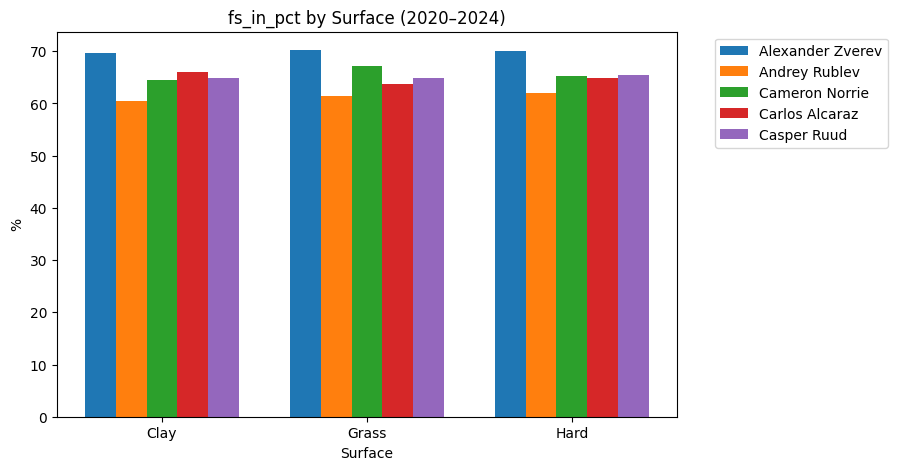

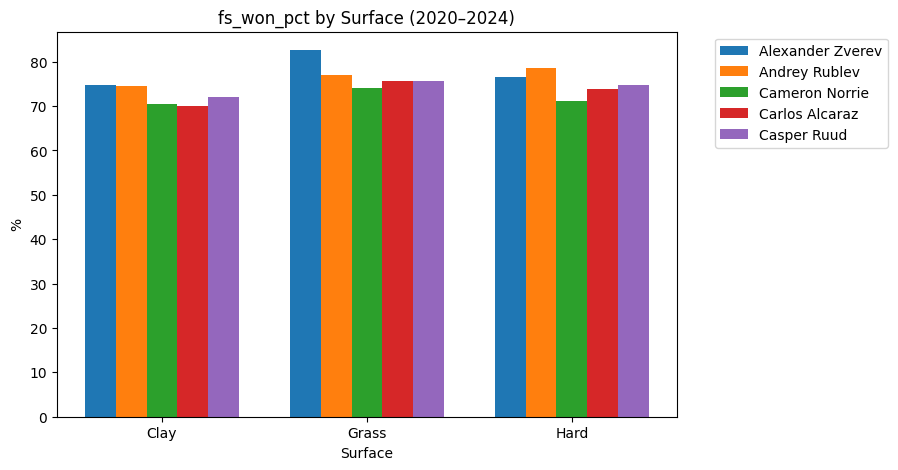

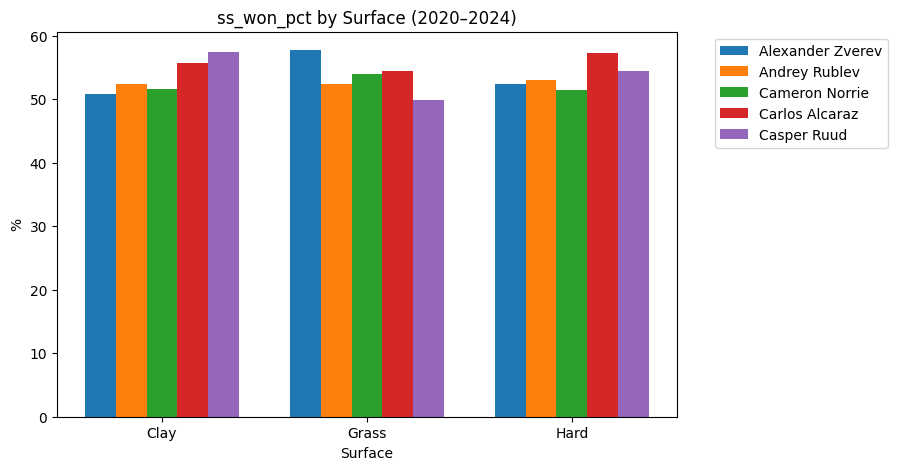

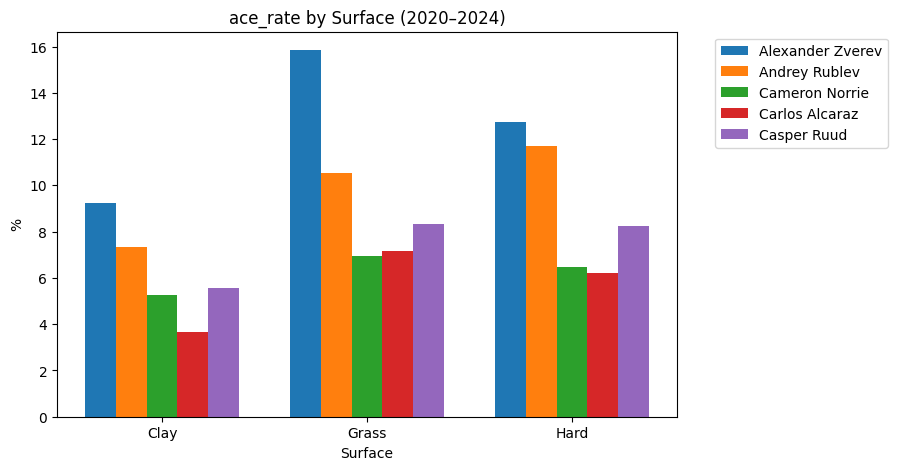

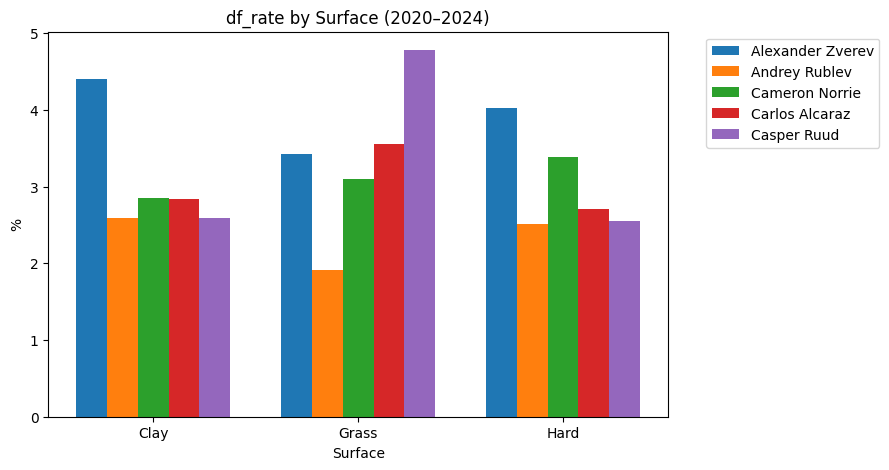

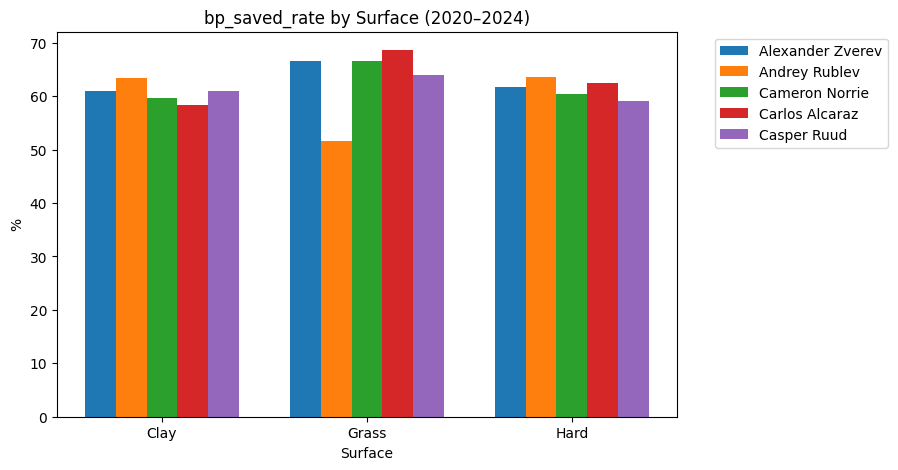

In [436]:
import numpy as np

stats = ["fs_in_pct","fs_won_pct","ss_won_pct","ace_rate","df_rate","bp_saved_rate"]
players = agg["player_name"].dropna().unique()[:5]
surfaces = agg["surface"].dropna().unique()

for stat in stats:
    plt.figure(figsize=(8,5))
    x = np.arange(len(surfaces))  
    width = 0.15                   

    for i, name in enumerate(players):
        sub = agg[agg["player_name"] == name]
        values = [sub[sub["surface"]==s][stat].mean()*100 for s in surfaces]
        plt.bar(x + i*width, values, width, label=name)

    plt.xticks(x + width*(len(players)-1)/2, surfaces)
    plt.title(f"{stat} by Surface (2020–2024)")
    plt.ylabel("%")
    plt.xlabel("Surface")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
   



We compare serve statistics for top players across surfaces. 
Overall, ace rates are highest on grass and lowest on clay, reflecting the faster conditions of grass courts. 
Among the players analyzed, Alexander Zverev consistently records the highest ace rate across all surfaces, peaking at 15.9% on grass. 
He also shows the strongest first- and second-serve performance on grass while keeping his double-fault rate relatively low.

Casper Ruud demonstrates stable first-serve percentages across all surfaces, but his double-fault rate increases noticeably on grass 
(about 1.8 times higher than on other surfaces). 
Carlos Alcaraz has the lowest ace rate on clay among the group, while also producing more double faults and saving more break points on grass. 
Cameron Norrie, Alcaraz, and Ruud display very similar overall serve profiles on grass, 
suggesting that the differences between elite players are subtle and that performance margins at the top level remain small.


#### Match stats analysis of 5 players from top-20 list across years

In [437]:
top20_only = top20_only.copy()
top20_only["year"] = top20_only["tourney_date"].dt.year

agg3 = (top20_only.groupby(["player_name", "year"])
        [["fs_in_pct","fs_won_pct","ss_won_pct","df_rate","ace_rate","bp_saved_rate","won"]]
        .mean()
        .reset_index())


In [438]:
agg4 = (top20_only.groupby([ "year"])
        [["fs_in_pct","fs_won_pct","ss_won_pct","df_rate","ace_rate","bp_saved_rate","won"]]
        .mean()
        .reset_index())
agg4.head()

,year,fs_in_pct,fs_won_pct,ss_won_pct,df_rate,ace_rate,bp_saved_rate,won
0,2020,0.634555,0.746609,0.531116,0.035383,0.088496,0.616355,0.677530
1,2021,0.633606,0.747767,0.535832,0.032961,0.088944,0.598224,0.693472
2,2022,0.644538,0.748134,0.535176,0.032702,0.089809,0.616941,0.702108
3,2023,0.636622,0.749782,0.532411,0.033912,0.089803,0.623632,0.670065
4,2024,0.641248,0.753681,0.550337,0.030872,0.096147,0.634823,0.681553


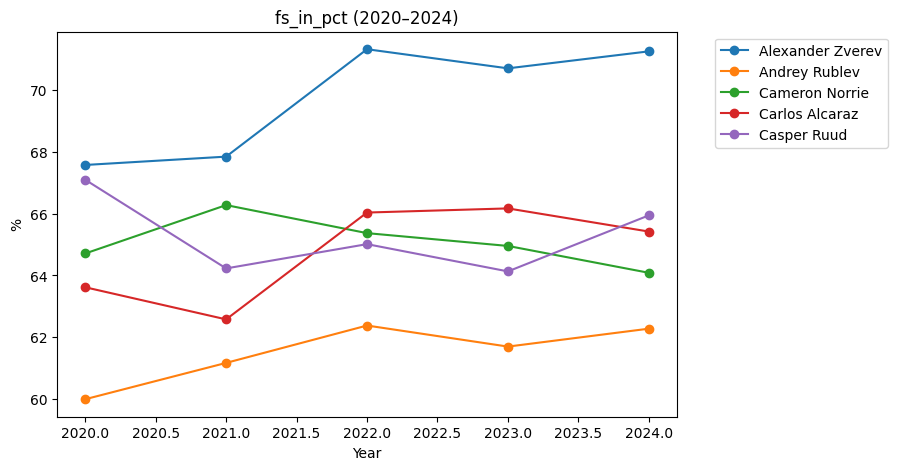

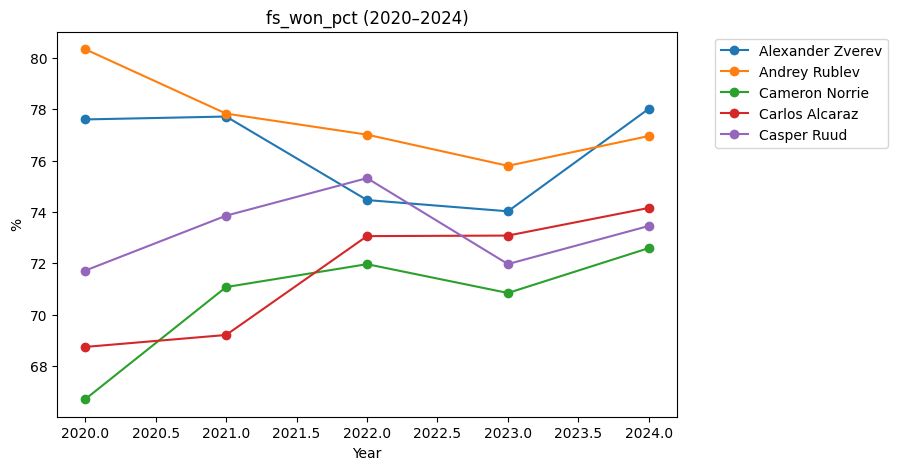

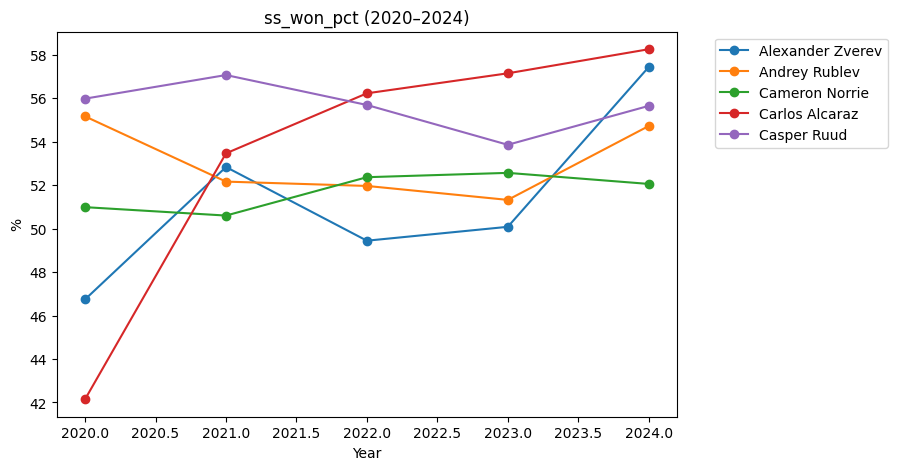

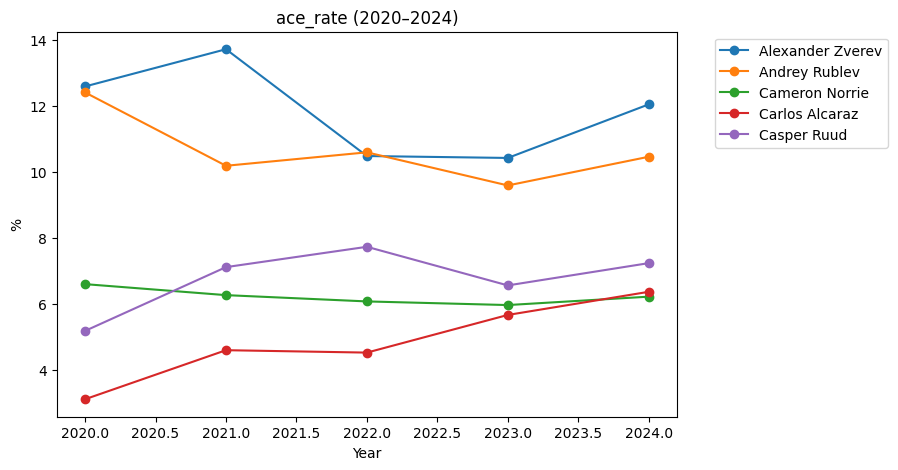

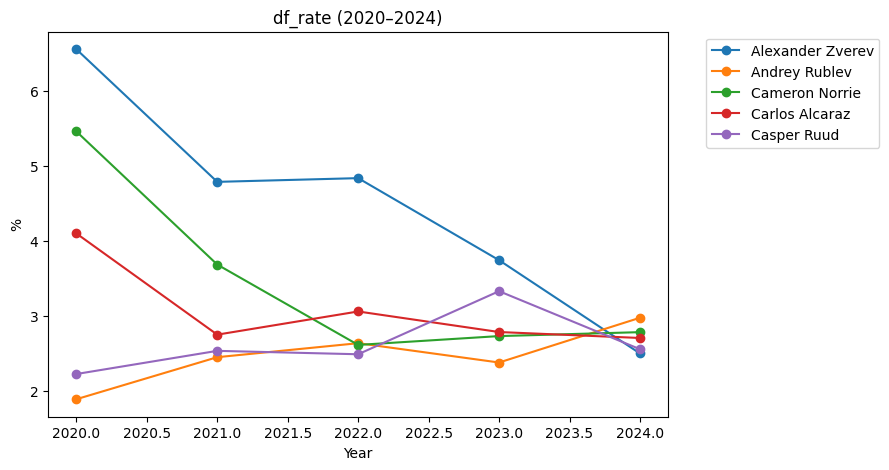

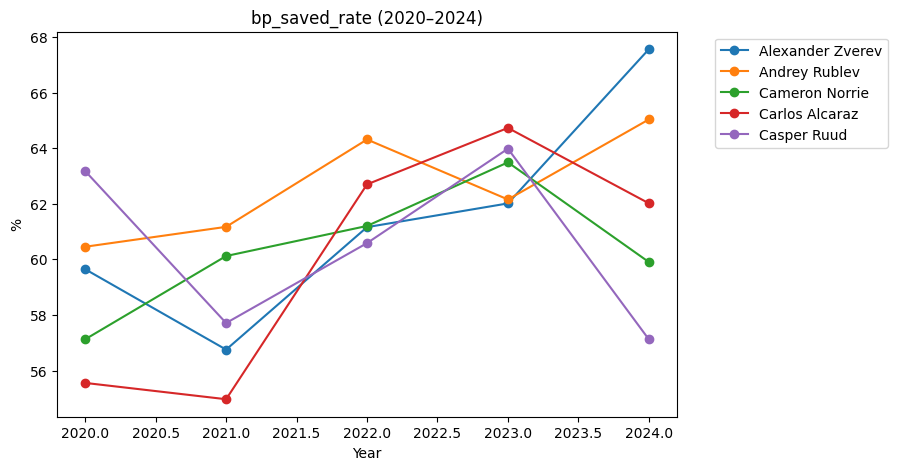

In [439]:
stats = ["fs_in_pct","fs_won_pct","ss_won_pct","ace_rate","df_rate","bp_saved_rate"]
players = agg3["player_name"].dropna().unique()[:5]

for stat in stats:
    plt.figure(figsize=(8,5))
    
    for name in players:
        sub = agg3[agg3["player_name"] == name]
        plt.plot(sub["year"], sub[stat]*100, marker="o", label=name)
    
    plt.title(f"{stat} (2020–2024)")
    plt.ylabel("%")
    plt.xlabel("Year")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


Cameron Norrie, Carlos Alcaraz, and Alexander Zverev all significantly reduced their double-fault rates between 2020 and 2024. 
Casper Ruud and Andrey Rublev, in contrast, started with lower double-fault rates than the first three players, but their rates increased over time. 
By 2024, all five players had converged into a similar range of 2.4%–3.0%.

Alexander Zverev’s overall serve performance in 2024 was stronger than in earlier years, although his peak ace rate of nearly 14% was recorded in 2021. 
Carlos Alcaraz has shown steady improvements in serve performance across the period, with a particularly notable jump in second-serve effectiveness between 2020 and 2021.

Andrey Rublev improved his first-serve percentage by 2024 but displayed weaker overall serve performance compared with earlier years: a lower ace rate, slightly higher double-fault rate, but stronger performance under pressure, saving more break points.


### Head_to_head weakness analysis of Carlos Alcaraz against 15 players from top-20 list based on matches of 2023-2024

We will analyse Carlos Alcaraz main stats against 15 players in comparison to his average match stats.

The metrics to be analyzed are:
1. Win percentage
2. Double Fault rate
3. First serve performance
4. Second serve performance
5. Breakpoints saved percentage

These figures should be read with caution, as most of these head-to-heads are based on only a few matches.

In [440]:
#Filterring to matches from 2023-2024 
top20_vs_top20 = top20_vs_top20[top20_vs_top20["tourney_date"].dt.year.between(2023, 2024)]

#grouping by player_name and opponent name to find mean stats for every pair of players 
agg5 = (top20_vs_top20.groupby(["player_name", "opp_name"])
        [["fs_in_pct","fs_won_pct","ss_won_pct","df_rate","ace_rate","bp_saved_rate","won"]]
        .mean()
        .reset_index())
agg5.head(20)

#Extracting rows where Alcaraz is the main player
Alcaraz_vs=agg5[agg5["player_name"]=="Carlos Alcaraz"]
Alcaraz_vs


,player_name,opp_name,fs_in_pct,fs_won_pct,ss_won_pct,df_rate,ace_rate,bp_saved_rate,won
42,Carlos Alcaraz,Alexander Zverev,0.655508,0.747587,0.570483,0.018841,0.062457,0.707826,0.571429
43,Carlos Alcaraz,Andrey Rublev,0.708507,0.792859,0.651766,0.024103,0.092486,0.769231,0.666667
44,Carlos Alcaraz,Cameron Norrie,0.661164,0.714912,0.464607,0.034340,0.042815,0.562500,0.500000
45,Carlos Alcaraz,Casper Ruud,0.675000,0.648367,0.590196,0.031818,0.100000,0.250000,0.500000
46,Carlos Alcaraz,Daniil Medvedev,0.683733,0.745943,0.587670,0.015504,0.040386,0.428571,0.857143
47,Carlos Alcaraz,Felix Auger Aliassime,0.649449,0.778562,0.620884,0.033790,0.041989,0.850000,1.000000
48,Carlos Alcaraz,Gael Monfils,0.684149,0.770501,0.610306,0.026144,0.058217,0.791667,0.666667
49,Carlos Alcaraz,Holger Rune,0.619565,0.789474,0.714286,0.021739,0.043478,1.000000,1.000000
50,Carlos Alcaraz,Hubert Hurkacz,0.626545,0.718860,0.630273,0.005208,0.042239,0.350000,1.000000
51,Carlos Alcaraz,Jannik Sinner,0.649273,0.680685,0.445588,0.030360,0.046153,0.490278,0.666667


In [441]:
Alcaraz_vs.describe()

,fs_in_pct,fs_won_pct,ss_won_pct,df_rate,ace_rate,bp_saved_rate,won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.663319,0.736610,0.583206,0.026348,0.056048,0.634072,0.784127
std,0.045866,0.055819,0.080274,0.013028,0.019291,0.208805,0.236468
min,0.560000,0.619048,0.445588,0.005208,0.037736,0.250000,0.333333
25%,0.640674,0.702431,0.551159,0.017172,0.042114,0.495139,0.619048
50%,0.661164,0.747587,0.589744,0.026144,0.046153,0.666667,0.857143
75%,0.683941,0.780679,0.625579,0.033136,0.063471,0.780449,1.000000
max,0.756786,0.792859,0.714286,0.056604,0.100000,1.000000,1.000000


In [442]:
#Sorting my won column
cols = ["opp_name","won","fs_in_pct","fs_won_pct","ss_won_pct","bp_saved_rate"]
Alcaraz_sorted = Alcaraz_vs[cols].sort_values("won", ascending=True)

Alcaraz_sorted.head(10)


,opp_name,won,fs_in_pct,fs_won_pct,ss_won_pct,bp_saved_rate
53,Novak Djokovic,0.333333,0.679373,0.689950,0.465488,0.697917
44,Cameron Norrie,0.500000,0.661164,0.714912,0.464607,0.562500
45,Casper Ruud,0.500000,0.675000,0.648367,0.590196,0.250000
42,Alexander Zverev,0.571429,0.655508,0.747587,0.570483,0.707826
43,Andrey Rublev,0.666667,0.708507,0.792859,0.651766,0.769231
48,Gael Monfils,0.666667,0.684149,0.770501,0.610306,0.791667
51,Jannik Sinner,0.666667,0.649273,0.680685,0.445588,0.490278
46,Daniil Medvedev,0.857143,0.683733,0.745943,0.587670,0.428571
47,Felix Auger Aliassime,1.000000,0.649449,0.778562,0.620884,0.850000
49,Holger Rune,1.000000,0.619565,0.789474,0.714286,1.000000


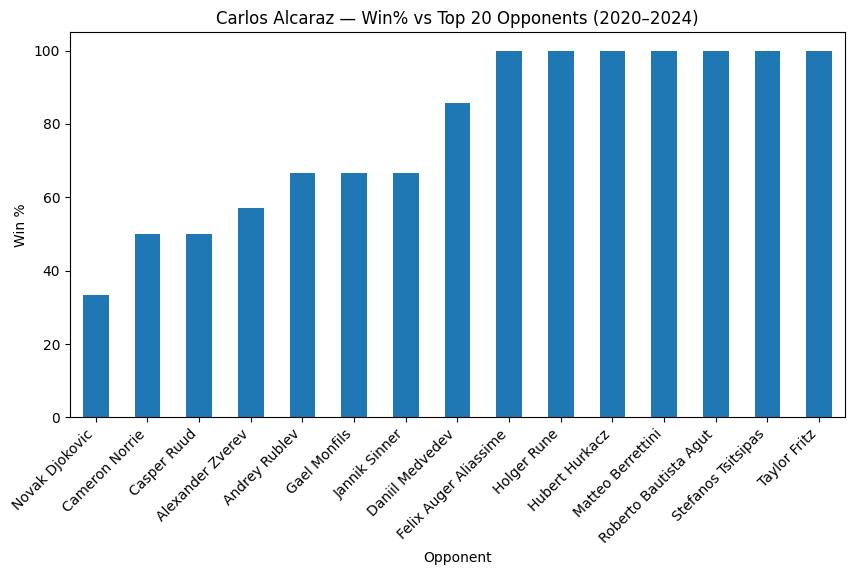

In [443]:
#Buildinh a bar plot with win percentage of Alcaraz against 15 opponents in ascending order
Alcaraz_vs_plot = Alcaraz_vs.copy()
Alcaraz_vs_plot["win_pct"] = Alcaraz_vs_plot["won"] * 100

Alcaraz_vs_plot.sort_values("win_pct", ascending=True).plot(
    x="opp_name", y="win_pct", kind="bar", figsize=(10,5), legend=False
)
plt.title("Carlos Alcaraz — Win% vs Top 20 Opponents (2020–2024)")
plt.ylabel("Win %")
plt.xlabel("Opponent")
plt.xticks(rotation=45, ha="right")
plt.show()


In the past two years, Carlos Alcaraz has won 33% of matches against Novak Djokovic, 50% against Cameron Norrie and Casper Ruud, 57% against Alexander Zverev, and 66% against Gaël Monfils, Jannik Sinner, and Andrey Rublev.

##### DF rate analysis VS opponents in comparison to the ALcaraz's mean df of 2.63%

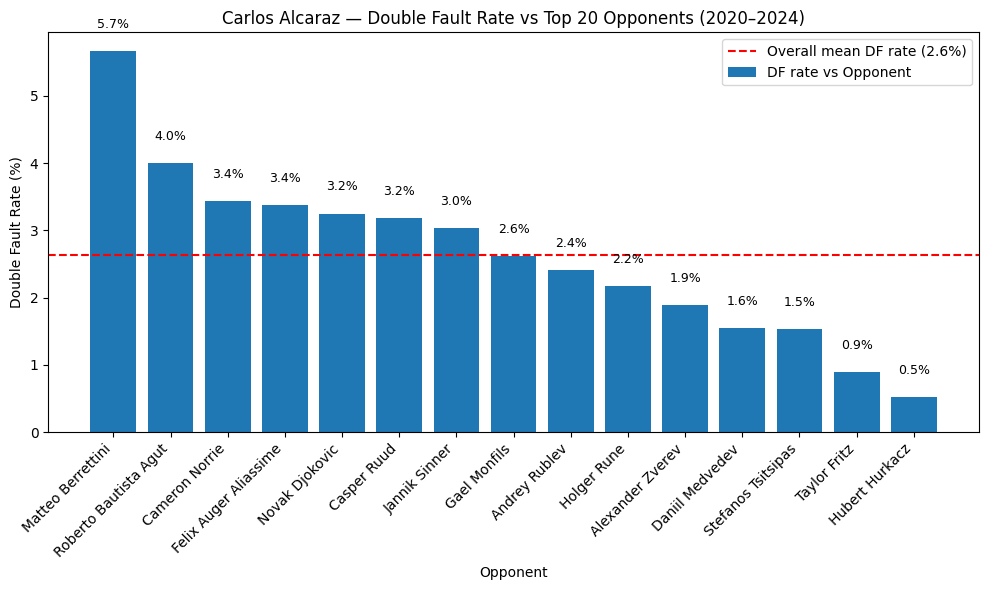

In [444]:

# Overall DF rate (mean across all top20 opponents)
overall_df = Alcaraz_vs["df_rate"].mean()

# Sort opponents by DF rate
Alcaraz_vs_sorted_df = Alcaraz_vs.sort_values("df_rate", ascending=False)

#building a plot 
plt.figure(figsize=(10,6))
bars = plt.bar(Alcaraz_vs_sorted_df["opp_name"], Alcaraz_vs_sorted_df["df_rate"]*100, label="DF rate vs Opponent")

# Adding line for overall mean
plt.axhline(overall_df*100, color="red", linestyle="--", label=f"Overall mean DF rate ({overall_df*100:.1f}%)")

# Annotate bars
for b, v in zip(bars, Alcaraz_vs_sorted_df["df_rate"]*100):
    plt.text(b.get_x() + b.get_width()/2, v+0.3, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

plt.title("Carlos Alcaraz — Double Fault Rate vs Top 20 Opponents (2020–2024)")
plt.ylabel("Double Fault Rate (%)")
plt.xlabel("Opponent")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In the last two years, Carlos Alcaraz recorded his highest double-fault rate against Matteo Berrettini at 5.7%, more than double his average of 2.6%. He also served more double faults than usual against Roberto Bautista Agut (4%), Cameron Norrie and Félix Auger-Aliassime (both 3.4%), Novak Djokovic and Casper Ruud (3.2%), and Jannik Sinner (3.0%). These figures should be read with caution, as most of these head-to-heads are based on only a few matches. The higher rates may also reflect the pressure created by strong returners such as Djokovic and Bautista Agut, or aggressive first-strike players like Berrettini and Auger-Aliassime.

##### Firse serve performance vs opponents analysis in comparison to mean first serve won percentage of  73.7%

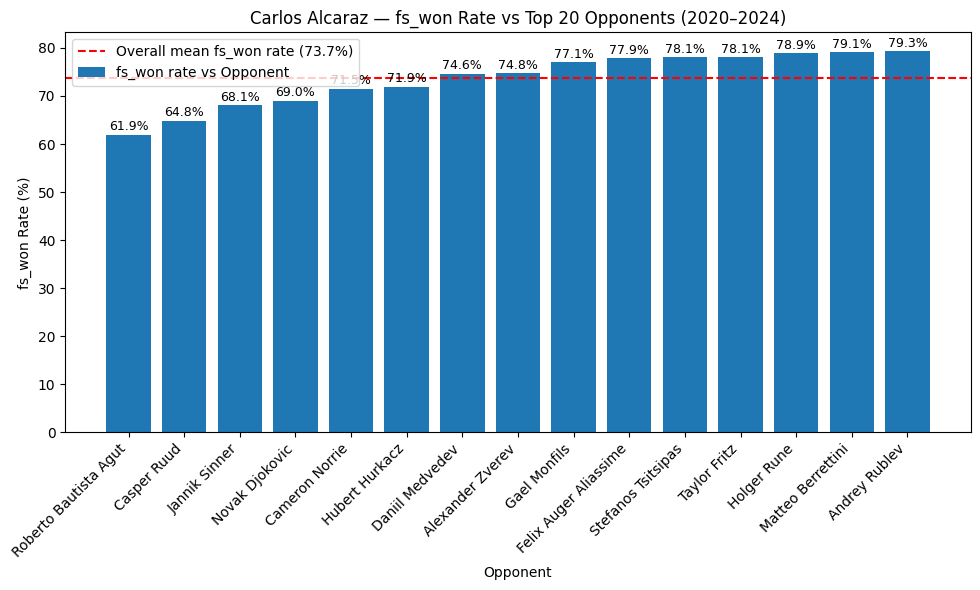

In [445]:
# Overall fs rate (mean across all top20 opponents)
overall_fs_won = Alcaraz_vs["fs_won_pct"].mean()

# Sort opponents by fs won rate
Alcaraz_vs_sorted_fs = Alcaraz_vs.sort_values("fs_won_pct", ascending=True)

plt.figure(figsize=(10,6))
bars = plt.bar(Alcaraz_vs_sorted_fs["opp_name"], Alcaraz_vs_sorted_fs["fs_won_pct"]*100, label="fs_won rate vs Opponent")

# Add line for overall mean
plt.axhline(overall_fs_won*100, color="red", linestyle="--", label=f"Overall mean fs_won rate ({overall_fs_won*100:.1f}%)")

# Annotate bars
for b, v in zip(bars, Alcaraz_vs_sorted_fs["fs_won_pct"]*100):
    plt.text(b.get_x() + b.get_width()/2, v+0.3, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

plt.title("Carlos Alcaraz — fs_won Rate vs Top 20 Opponents (2020–2024)")
plt.ylabel("fs_won Rate (%)")
plt.xlabel("Opponent")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

Carlos Alcaraz’s lowest first-serve points won rate in the last two years came against Roberto Bautista Agut at 61.9%, far below his average of 73.7%. Similar patterns appear against strong returners such as Casper Ruud (64.8%), Jannik Sinner (68.1%), and Novak Djokovic (69%), suggesting that elite return players can reduce Alcaraz’s usual advantage on serve.

##### Second serve won percentage vs players in comparison to the mean second serve performance of 58.3%

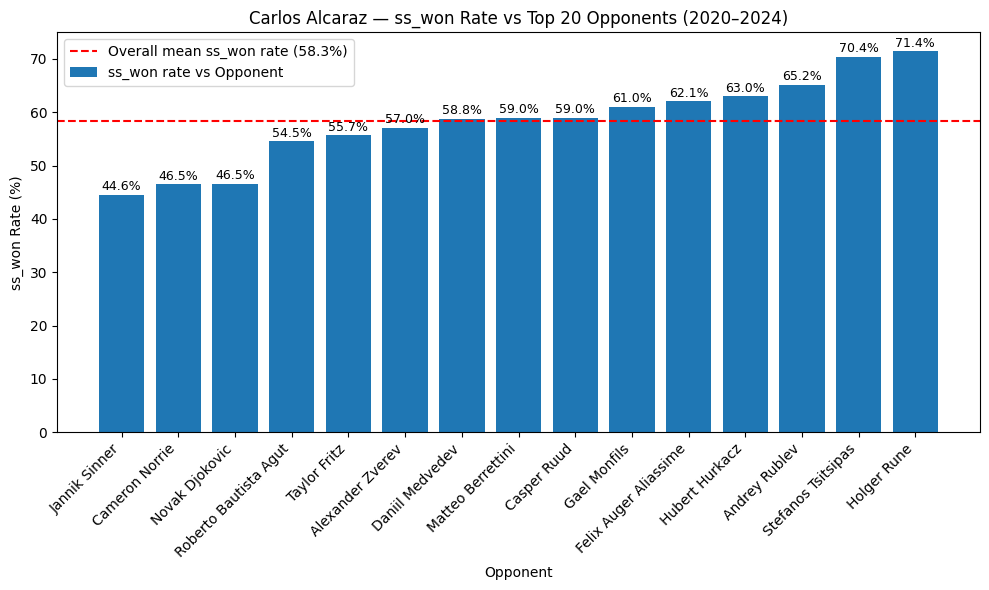

In [446]:
# Overall ss_won rate (mean across all top20 opponents)
overall_ss_won = Alcaraz_vs["ss_won_pct"].mean()

# Sort opponents by DF rate
Alcaraz_vs_sorted_ss = Alcaraz_vs.sort_values("ss_won_pct", ascending=True)

plt.figure(figsize=(10,6))
bars = plt.bar(Alcaraz_vs_sorted_ss["opp_name"], Alcaraz_vs_sorted_ss["ss_won_pct"]*100, label="ss_won rate vs Opponent")

# Add line for overall mean
plt.axhline(overall_ss_won*100, color="red", linestyle="--", label=f"Overall mean ss_won rate ({overall_ss_won*100:.1f}%)")

# Annotate bars
for b, v in zip(bars, Alcaraz_vs_sorted_ss["ss_won_pct"]*100):
    plt.text(b.get_x() + b.get_width()/2, v+0.3, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

plt.title("Carlos Alcaraz — ss_won Rate vs Top 20 Opponents (2020–2024)")
plt.ylabel("ss_won Rate (%)")
plt.xlabel("Opponent")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

Carlos Alcaraz’s average second-serve points won rate is 58.3%, understandably lower than his first-serve performance. His lowest figure comes against Jannik Sinner at 44.6%, indicating Sinner’s ability to attack his second serve. Similar patterns appear against Cameron Norrie and Novak Djokovic, where Alcaraz wins only 46.5% of points.

##### Breakpoints saved rate vs opponents analysis in comparison to average breakpoints saved rate of 63.4%

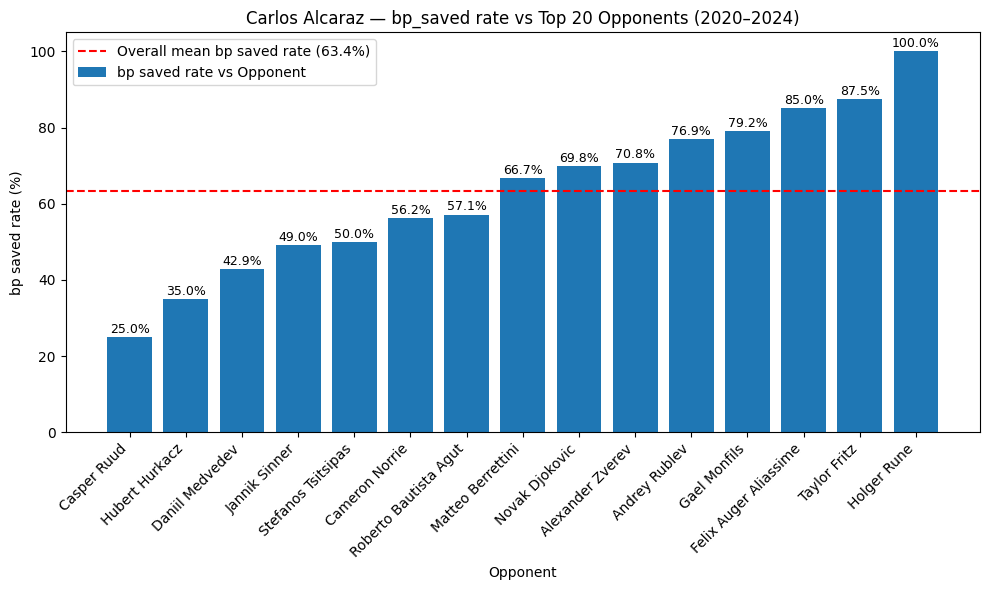

In [447]:
# Overall bp rate (mean across all top20 opponents)
overall_bp_saved = Alcaraz_vs["bp_saved_rate"].mean()

# Sort opponents by DF rate
Alcaraz_vs_sorted_bp = Alcaraz_vs.sort_values("bp_saved_rate", ascending=True)

plt.figure(figsize=(10,6))
bars = plt.bar(Alcaraz_vs_sorted_bp["opp_name"], Alcaraz_vs_sorted_bp["bp_saved_rate"]*100, label="bp saved rate vs Opponent")

# Add line for overall mean
plt.axhline(overall_bp_saved*100, color="red", linestyle="--", label=f"Overall mean bp saved rate ({overall_bp_saved*100:.1f}%)")

# Annotate bars
for b, v in zip(bars, Alcaraz_vs_sorted_bp["bp_saved_rate"]*100):
    plt.text(b.get_x() + b.get_width()/2, v+0.3, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

plt.title("Carlos Alcaraz — bp_saved rate vs Top 20 Opponents (2020–2024)")
plt.ylabel("bp saved rate (%)")
plt.xlabel("Opponent")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

Carlos Alcaraz saves on average 63.4% of break points faced. This figure drops sharply against Casper Ruud (25%) and is also low against Hubert Hurkacz (35%) and Daniil Medvedev (42.9%). Against Jannik Sinner and Stefanos Tsitsipas, his rate is closer to 50%, still below his usual level.

##### Carlos Alcaraz Overview:

Carlos Alcaraz is one of the strongest tennis player of our times and his outstanding achievements only prove it. Nevertheless, the match statistics of 2023-2024 demostrate both his strenghts and areas of vulnerabilities. 
For example, Alcaraz has a low rate of double faults, only 2.63%, nevertheless, under pressure, this rate can double as it happened with Matteo Berrettini. 
As well, Alcaraz has a high first serve performance of  73.7%, however when played against strong returners such as Jannik Sinner, Novak Djokovic, and Roberto Bautista Agut, his serve performance can significantly worsen for more than 10%. The same patterns are noticed in regard to his second serve performance. 
Alcaraz saves 63.4% of break points, slightly above the ATP average of 60%. While this is a solid result under pressure, it is slightly lower than the performance of such players as Djokovic or Nadal, who typically exceed 65–70%.

#### Building Elo rating 

An Elo rating is a statistical system for ranking players' relative skill levels in competitive games, named after its creator, Arpad Elo. The system works by comparing a player's current rating to their opponent's rating; a higher rating indicates a stronger player, and the system predicts the likelihood of each player winning. After each game, ratings are adjusted based on the result and the initial rating difference, with wins against higher-rated opponents yielding more points and losses against lower-rated opponents costing more. 

Steps:
1. Introduce EloConfig class with default attributes
2. Build update_elo function that calculates expected score and updates players' elo rating based on actual outcome of the match.
3. Build get_elo function that collects elo records
4. Train a model to predict matches outcome based on Elo rating


In [448]:
from pathlib import Path
import sys

In [449]:
from dataclasses import dataclass


#Introducing EloConfig class with parametters for reusability and flexibility and organization
@dataclass
class EloConfig:
    k_factor: float = 32.0   # how fast ratings update
    base_rating: float = 1500.0 #default elo rating for players with no records in elo dataset


In [450]:
import math

#building a method to update elo rating after actual score
def update_elo(r_w, r_l, score, cfg: EloConfig):
    """
    Update Elo ratings after a match.

    r_w: current rating of player A (winner in our loop)
    r_l: current rating of player B (loser in our loop)
    score: 1.0 if A wins, 0.0 if A loses (in our loop always 1 for winner, 0 for loser)
    cfg: EloConfig with k_factor, etc.
    """
    # expected scores
    exp_w = 1.0 / (1.0 + 10 ** ((r_l - r_w) / 400))
    exp_l = 1.0 - exp_w

    # update ratings
    r_w_new = r_w + cfg.k_factor * (score - exp_w)   # winner
    r_l_new = r_l + cfg.k_factor * ((1-score) - exp_l)  # loser

    return r_w_new, r_l_new


In [451]:
cfg = EloConfig(k_factor=32.0)
elos = {}  # dictionary of player_id → current Elo rating

#building a function to get player's elo rating by his player ID
def get_elo(pid):
    return elos.get(pid, cfg.base_rating)

#ensuring the dataset does not include matches with incomplete data in winner_id, loser_id or tourney_date?
ma = matches_to_2024.dropna(subset=["winner_id","loser_id","tourney_date"]).copy()
ma["tourney_date"] = pd.to_datetime( ma["tourney_date"], format="%Y%m%d",errors="coerce")
ma = ma.sort_values("tourney_date")

#introducing list where playee data and elo info will be kept
elo_records = []

#looping through each match to get each winner id and loser
for _, row in ma.iterrows():
    wa, la = row["winner_id"], row["loser_id"]
    r_w, r_l = get_elo(wa), get_elo(la)

    # then append record of the match and elo rating befor it
    elo_records.append({
        "tourney_id": row.get("tourney_id"),   # include if present
        "match_num": row.get("match_num"), 
        "tourney_date": row["tourney_date"],
        "winner_id": wa,
        "loser_id": la,
        "elo_w_before": r_w,
        "elo_l_before": r_l
    })

    # update ratings
    r_w_new, r_l_new = update_elo(r_w, r_l, 1.0, cfg)
    elos[wa], elos[la] = r_w_new, r_l_new

#converting elo_records into Data frame
elo_df = pd.DataFrame(elo_records)
elo_df.head()


,tourney_id,match_num,tourney_date,winner_id,loser_id,elo_w_before,elo_l_before
0,2014-339,1,2013-12-29,103813,105902,1500.000000,1500.0
1,2014-339,27,2013-12-29,103720,103819,1500.000000,1500.0
2,2014-339,26,2013-12-29,103720,105453,1516.000000,1500.0
3,2014-339,25,2013-12-29,103819,104871,1484.000000,1500.0
4,2014-339,24,2013-12-29,105453,105227,1484.736307,1500.0


In [452]:
#merging matches info of top-20 players with elo info
keys = ["tourney_id", "match_num", "winner_id", "loser_id"]
mm = m_top.merge(
    elo_df[keys + ["elo_w_before","elo_l_before"]],
    on=keys, how="left", validate="1:1"
)

#calculating elo difference for each pair of players per match
mm["elo_diff"] = mm["elo_w_before"] - mm["elo_l_before"]

#creating a column indicating if a tourney is a grand slam 1 or not 0
mm["is_grand_slam"] = (mm.get("tourney_level") == "G").astype(int) if "tourney_level" in mm else 0

len(mm)

4184

In [453]:
print("m_top non-null keys:",
      m_top[["tourney_date","winner_id","loser_id"]].notna().all(axis=1).sum(),
      "/", len(m_top))
print("elo_df non-null keys:",
      elo_df[["tourney_date","winner_id","loser_id"]].notna().all(axis=1).sum(),
      "/", len(elo_df))

m_top non-null keys: 4184 / 4184
elo_df non-null keys: 30573 / 30573


In [454]:
#checking dates alignement when m_top and elo_df merged
keys = ["tourney_id","match_num","winner_id","loser_id"]

probe = (
    m_top[keys + ["tourney_date"]]
    .merge(
        elo_df[keys + ["tourney_date"]]
            .rename(columns={"tourney_date":"elo_date"}),
        on=keys, how="left", validate="1:1"
    )
)


exact = (probe["tourney_date"] == probe["elo_date"]).sum()
print("Exact date matches:", exact, "/", len(probe))



exact==len(mm)

Exact date matches: 4184 / 4184


np.True_

In [455]:
#Building a trainset with columns y indicating outcome for a player where 1 is a win, 0 is a loss

# Winner perspective
win_ex = mm[["tourney_date","surface","is_grand_slam","elo_diff"]].copy()
win_ex["y"] = 1

# Loser perspective (flip elo_diff sign!)
lose_ex = mm[["tourney_date","surface","is_grand_slam","elo_diff"]].copy()
lose_ex["elo_diff"] = -lose_ex["elo_diff"]
lose_ex["y"] = 0

# Combine
trainset = pd.concat([win_ex, lose_ex], ignore_index=True)
print(trainset.shape)
trainset.head()


(8368, 5)


,tourney_date,surface,is_grand_slam,elo_diff,y
0,2020-01-06,Hard,0,-23.269952,1
1,2020-01-06,Hard,0,165.587654,1
2,2020-01-06,Hard,0,130.126532,1
3,2020-01-06,Hard,0,265.299105,1
4,2020-01-06,Hard,0,-43.990844,1


In [456]:
#Splitting the trainset into train and test parts. The train set will contain matches info before 2024 and the model will be tested on matches of 2024.
#As well, we split columns into features such as "surface", "is_grand_slam","elo_diff" and target which is y or outcome column.
train_mask = trainset["tourney_date"]<"2024-01-01"

X_train = trainset.loc[train_mask, ["surface","is_grand_slam","elo_diff"]]
y_train = trainset.loc[train_mask, "y"].astype(int)

X_test  = trainset.loc[~train_mask, ["surface","is_grand_slam","elo_diff"]]
y_test  = trainset.loc[~train_mask, "y"].astype(int)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (6556, 3) Test: (1812, 3)


In [457]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#turning surface categories into 0/1 dummy variables
ct = ColumnTransformer(
    [("ohe", OneHotEncoder(handle_unknown="ignore"), ["surface"])],
    remainder="passthrough"
)

#building a pipeline to call preprocessing and to learn the logic behind train set in one go
clf = Pipeline([
    ("prep", ct),
    ("lr", LogisticRegression(max_iter=1000))
])

#trains model, adjusts the coefficients
clf.fit(X_train, y_train)


,steps,"[('prep', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [458]:
from sklearn.metrics import accuracy_score, log_loss, brier_score_loss

#testing the model on test set
p_test = clf.predict_proba(X_test)[:,1]  # probability of y=1

#Calculating key metrics to access model performance
print("ACC:", accuracy_score(y_test, (p_test>=0.5).astype(int)))
print("LogLoss:", log_loss(y_test, p_test))
print("Brier:", brier_score_loss(y_test, p_test))


ACC: 0.7362030905077263
LogLoss: 0.5258700038968862
Brier: 0.17549490742062124


#### Model results overview
- The model accuracy is 74% which is a quite high performance. 
- Logloss is around 53% which is not a bad result, they suggest that the probabilities aren’t random, they’re calibrated.
- The brier score is 17.5% which is a good result and indicates that the model produces well-calibrated win probabilities.


Alcaraz VS Djokovic example

In [459]:

alcaraz_id = int(players.loc[players["name"] == "Carlos Alcaraz", "player_id"].iloc[0])
djokovic_id = int(players.loc[players["name"] == "Novak Djokovic", "player_id"].iloc[0])

elo_alcaraz = elos.get(alcaraz_id, 1500)
elo_djokovic = elos.get(djokovic_id, 1500)
elo_diff = elo_djokovic - elo_alcaraz 


print("Djokovic Elo:", elo_djokovic, "Alcaraz Elo:", elo_alcaraz, "Diff:", elo_diff)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [ ]:
example = pd.DataFrame([{
    "surface": "Hard",
    "is_grand_slam": 1,
    "elo_diff": elo_diff
}])

prob = clf.predict_proba(example)[:,1][0]
print(f"Predicted win probability (Djokovic vs Alcaraz): {prob:.2f}")


Predicted win probability (Djokovic vs Alcaraz): 0.58


The model predicts that Novak Djokovic would win in the match with Carlos Alcaraz with the probability of 58%.

!The model is trained on the data of 2020-2024, for this reason it may not reflect latest trends, changes in ATP.

#### Conclusion
1. Built Elo ratings for ATP matches (2020–2024) and combined them with match metadata.
2. Trained a logistic regression model on Elo difference, surface, and Grand Slam status.
3. The model achieves ~74% accuracy with good calibration (LogLoss ~0.53, Brier ~0.18).
4. Case study: predicts Djokovic has a 58% win probability vs Alcaraz.
5. Limitations: dataset only covers 2020–2024; does not capture injuries, current form, or non-statistical factors.